# Estudo do melhor K

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/dados_asteroides_processados.csv')
data = df.drop(columns=['is_hazardous'])
target = df['is_hazardous']

In [13]:
dfTeste = df.iloc[34400:34800]

data_cut = dfTeste.drop(columns=['is_hazardous'])
target_cut = dfTeste['is_hazardous']
target_cut.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 34400 to 34799
Series name: is_hazardous
Non-Null Count  Dtype
--------------  -----
400 non-null    bool 
dtypes: bool(1)
memory usage: 532.0 bytes


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_cut, target_cut, test_size=0.2)

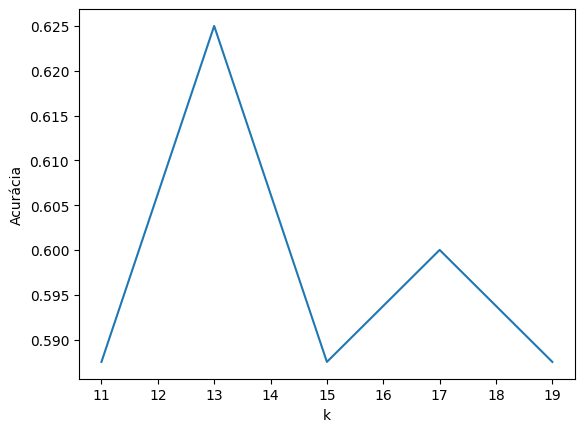

In [15]:
from knn import KNN
from sklearn.metrics import accuracy_score

acuracias = []
for k in range(11, 20, 2):
    knn = KNN(k)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    acuracias.append(accuracy_score(y_test, predictions))

plt.plot(range(11, 20, 2), acuracias)
plt.xlabel('k')
plt.ylabel('Acurácia')
plt.show()

## Comparação com sklearn

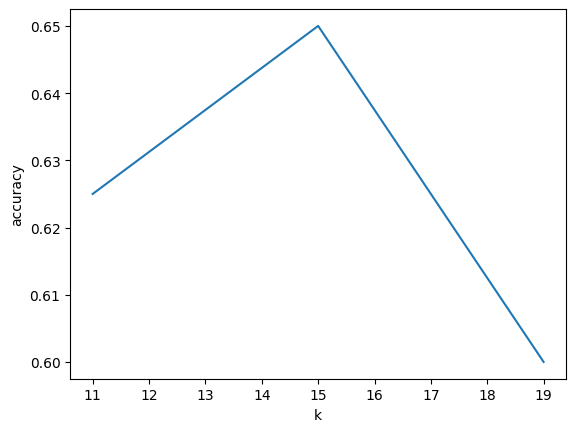

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/dados_asteroides_processados.csv')
data = df.drop(columns=['is_hazardous'])
target = df['is_hazardous']

X_train, X_test, y_train, y_test = train_test_split(data_cut, target_cut, test_size=0.2)

accuracy = []
for k in range(11, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, predictions))


plt.plot(range(11, 20, 2), accuracy)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

# Treinamento com mais dados

In [17]:
import pandas as pd
from knn import KNN
from sklearn.model_selection import train_test_split

dfTeste = df.iloc[32500:37000]

data_cut = dfTeste.drop(columns=['is_hazardous'])
target_cut = dfTeste['is_hazardous']

X_train, X_test, y_train, y_test = train_test_split(data_cut, target_cut, test_size=0.2)

# Contar quantos asteroides são perigosos
print(target_cut.value_counts()) 

knn = KNN(15)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

is_hazardous
True     2385
False    2115
Name: count, dtype: int64


In [18]:
from sklearn.metrics import accuracy_score, f1_score

print(f"Acuracia: {accuracy_score(y_test, predictions):.2f}")
print(f"F1: {f1_score(y_test, predictions, average='macro'):.2f}")

Acuracia: 0.55
F1: 0.55
